In [1]:
import numpy as np
from matplotlib import pyplot as plt
import zernike


In [35]:
dims = [1024, 1024]

xs = (np.arange(dims[0]) - dims[0]//2) / (dims[0]//2)
ys = (np.arange(dims[1]) - dims[1]//2) / (dims[1]//2)

xx, yy = np.meshgrid(xs, ys)

rhos = np.sqrt(xx**2.0 + yy**2.0)
phis = np.arctan2(yy, xx)

In [116]:
z_amounts = {(2,-2):28, (2,2):0,
             (3,-3):8.54, (3,-1):-13.3, (3,1):40, (3,3):5.3,
             (4,-2):-6.3, (4,0):46.3,(4,2):3.5,
             (6,0):1.36,
             (5,1):10}


In [117]:
phase_total = np.zeros(xx.shape)
for i in z_amounts:
    phase_total += 0.001 * z_amounts[i] * zernike.zernike(rhos, phis, i[1], i[0])

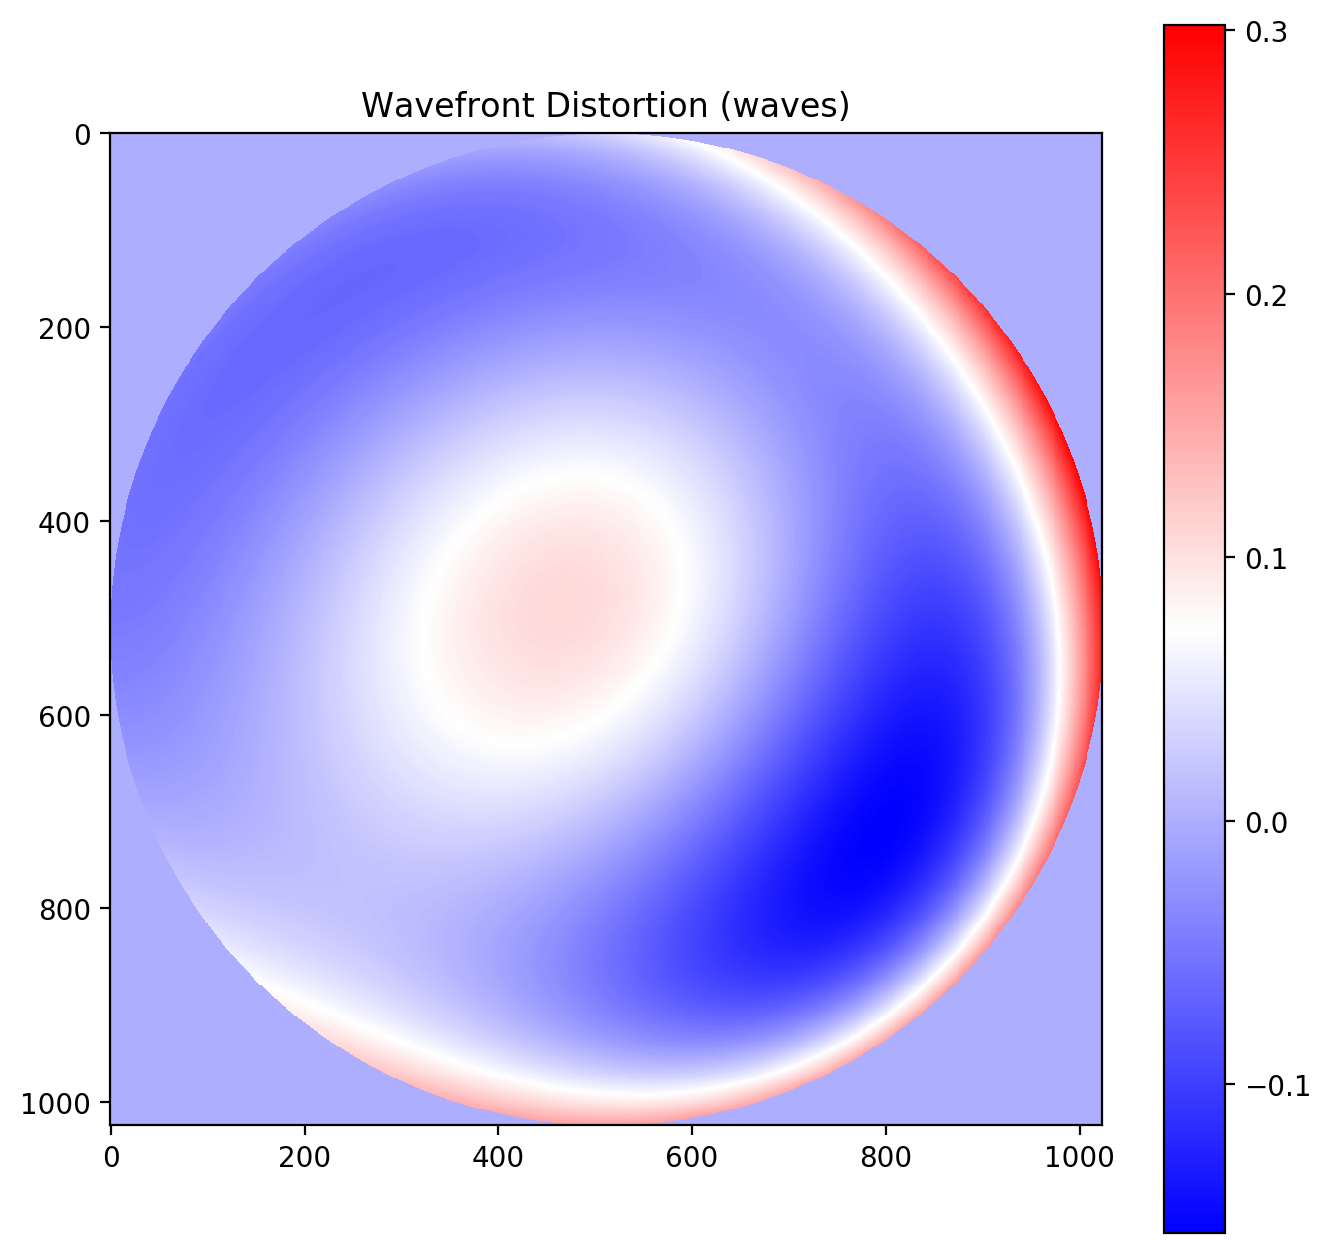

In [118]:
mask = np.zeros(xx.shape)
mask[rhos<1] = 1

masked_phase = phase_total * mask

plt.figure(figsize = (8,8),dpi=200)

plt.title("Wavefront Distortion (waves)")
plt.imshow(masked_phase, cmap = 'bwr',)
plt.colorbar()
plt.show()

In [119]:
rms_error = np.sqrt(np.mean(masked_phase[rhos<1]**2))
strehl_ratio = np.exp(-(2*np.pi*rms_error)**2)
print("RMS wavefront error = %.3f waves"%rms_error)
print("Strehl Ratio = %.3f "%strehl_ratio)

RMS wavefront error = 0.070 waves
Strehl Ratio = 0.822 


In [9]:
a[0]

2

In [11]:
z_amounts[(2,-2)]

28